# <center> Econ 390: Computational Economics (with Python) </center>
## <center> Dr. Yaroslav Rosokha</center>

# Dynamic Programming

## Contents
- [Motivation](#Motivation)
- [Background on Dynamic Optimization](#Background)
- [Dynamic Programming](#Dynamic-Programming)
    - [Finite-horizon Dynamic Programming](#Finite-horison-Dynamic-Programming)
- [Infinite-horizon Dynamic Programming](#Infinite-horison-Dynamic-Programming)
    - [Motivating Example](#Motivation)
    - [Value Function Iteration](#Value-Function-Iteration-Algorithm)

In [1]:
#Libraries that we have covered before that are used in this notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so
%matplotlib inline

## Optimization in Dynamic Settings

In static optimization, the task is to find a single value for each variable. In *dynamic settings* that have multiple time periods, we need to find the optimal policy for entire horizon. Where the policy (or strategy) has to specify the choice at every possible decision node that agent could face.

The example that you typically study in the intermediate microeconomics class is the optimal choice of consumption and saving over time. These problems are know as **intertemporal choice** problems.

# Dynamic Programming

> **dynamic programming** -- a collection of algorithms that can be used to compute optimal policies for dynamic control problems

The mathematical theory of dynamic programming go back to Bellman (1957) and Bertsekas (1976). The key idea of Dynamic Programming is the use of value functions to organize and structure the search for optimal policies. 

> **value function** (denoted as $V_t(x)$) -- the greatest feasible total expected payoff from time $t$ forward, if at time $t$ the system is in state $x$.

## Background

### The agent-environment interface
 - The decision-maker is called the agent (controller).
 - Everything outside the agent, is called the environment (control system).
 - The agent is selects actions (control signal) and the environment responds to those actions and presets new situations to the agent. 
 - The environment also gives rise to rewards.
 - Roughly speaking, the agent’s goal (control problem) is to maximize the total reward/utility over the long run.

### Control Problem: Four Elements

    
> **Model of the environment** - the rules of the environment (e.g., stochastic transitions across states)

> **Reward Function** – defines the goal
    - A mapping from perceived state (or state-action pair) to a reward/utility

> **Value Function** – functions of states (or of state-action pairs) that estimate "how good" it is for the agent to be in a given state (or how good it is to perform a given action in a given state)
    - The notion of "how good" is defined in terms of total future reward/utility that an agent can expect to accumulate starting from that state 
    - Since the rewards the agent can expect to receive depends on the actions she will take, the value function is specific to the policy

> **Policy Function** – defines actions at a given time
    - A mapping from perceived states to actions to be taken when in those states

# Finite-horizon Dynamic Programming

## Discrete Choice

### Motivating Problem

Suppose you own a share of stock that pays a dividend $D_t\in\{0,10\}$ each period. Specifically, the dividend realization depends on how well the company does: when the company does well you get $10$ and when the company does poorly you get $0$ (assume that these two states are equally likely and independent of past history of realizations).

For simplicity, suppose that you begin with 2 in your savings account and that the share of the stock is your only source of income. Further suppose that you can only consume in integer amounts, your utility of consuming $c$ units in a period is given by $u(c)=\sqrt(c)$, and that you live for $T=3$ periods.

You need to figure out your optimal policy. That is you need to figure out what will be your consumption decision depending on the period you are in and the total amount of assets in your account.

In [2]:
#Background
W0 = 2
D = np.array([0,10])
P = np.array([.5,.5])
T = 3

def util(x):
    return np.sqrt(x)

##### Practice Problem

Write a program to find the optimal policy for the problem above

In [5]:
#Step 1: What should you do in period 3? -- spend everything
asset_grid3=np.linspace(0,W0+T*D.max(),W0+T*D.max()+1,dtype=int) #in period 3 the maximum you could have is 2+3*10
policy3=asset_grid3.copy() #the best policy in period 3 is to spend everything
value3=util(policy3) #the value of having x units is u(x)

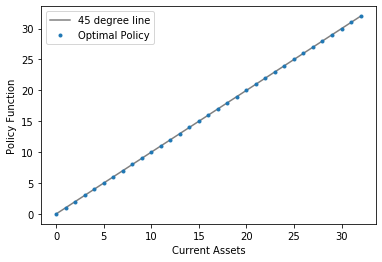

In [6]:
plt.plot(asset_grid3,asset_grid3,'gray',label='45 degree line')
plt.plot(asset_grid3,policy3,'.',label='Optimal Policy')
plt.xlabel('Current Assets')
plt.ylabel('Policy Function')
plt.legend()
plt.show()

In [8]:
# Step 2: Suppose you are in period 2 and you have W=5 in total
# What x maximizes that u(x)+ .5(Value3(W-x))+.5(Value3(W-x+10)?

spending_grid2=np.linspace(0,5,5+1,dtype=int)
expectedPayoffs=np.zeros_like(spending_grid2,dtype=float)

for x in spending_grid2: #can spend up to W (assuming no credit)
    expectedPayoffs[x]=util(x)+.5*value3[5-x]+.5*value3[5-x+10]

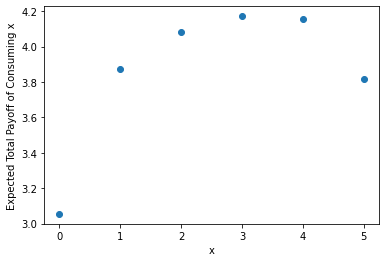

In [9]:
plt.plot(spending_grid2,expectedPayoffs,'o')
plt.xlabel('x')
plt.ylabel('Expected Total Payoff of Consuming x')
plt.show()

In [10]:
ix = expectedPayoffs.argmax()
spending_grid2[ix]

3

In [7]:
# Step 3: Find the optimal policy in period 2 (i.e., for all possible W)
t=2
asset_grid2=np.linspace(0,W0+t*D.max(),W0+t*D.max()+1,dtype=int) #in period 2 the maximum you could have is 2+2*10
policy2=np.zeros_like(asset_grid2,dtype=int)
value2=np.zeros_like(asset_grid2,dtype=float)

for a in asset_grid2:
    
    spending_grid2=np.linspace(0,a,a+1,dtype=int)
    expectedPayoffs=np.zeros_like(spending_grid2,dtype=float)

    for x in spending_grid2: #can spend up to A (assuming no credit)
        expectedPayoffs[x]=util(x)+.5*value3[a-x]+.5*value3[a-x+10]
        
    ix = expectedPayoffs.argmax()
    policy2[a] = spending_grid2[ix]
    value2[a] = expectedPayoffs[ix]

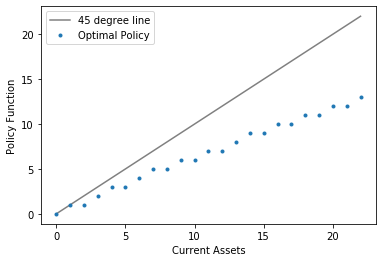

In [8]:
plt.plot(asset_grid2,asset_grid2,'gray',label='45 degree line')
plt.plot(asset_grid2,policy2,'.',label='Optimal Policy')
plt.xlabel('Current Assets')
plt.ylabel('Policy Function')
plt.legend()
plt.show()

In [9]:
# Step 4: Find the optimal policy for every period t (continue working backwards)

assets = np.zeros(shape=(T,W0+T*D.max()+1),dtype=int)
policies = np.zeros_like(assets,dtype=int)
values = np.zeros_like(assets,dtype=float)

for t in range(T,0,-1):
    
    max_assets = W0+t*D.max()
    assets[t-1][0:max_assets+1] = np.linspace(0,max_assets,max_assets+1,dtype=int)
    
    if t==T:
        
        policies[t-1] = assets[t-1].copy() #the best policy in period 3 is to spend everything
        values[t-1] = util(policies[t-1]) #the value of having x units is u(x)
    
    else:
        
        for a in assets[t-1][0:max_assets+1]:

            spending_grid=np.linspace(0,a,a+1,dtype=int)
            expectedPayoffs=np.zeros_like(spending_grid,dtype=float)

            for x in spending_grid: #can spend up to A (assuming no credit)
                expectedPayoffs[x]=util(x)+.5*values[t][a-x]+.5*values[t][a-x+D.max()]

            ix = expectedPayoffs.argmax()
            policies[t-1][a] = spending_grid[ix]
            values[t-1][a] = expectedPayoffs[ix]
        

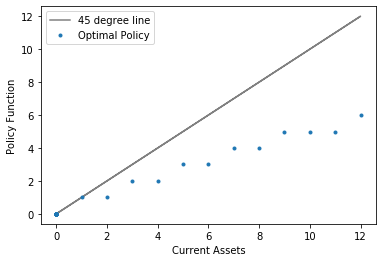

In [10]:
t=1 #
plt.plot(assets[t-1],assets[t-1],'gray',label='45 degree line')
plt.plot(assets[t-1],policies[t-1],'.',label='Optimal Policy')
plt.xlabel('Current Assets')
plt.ylabel('Policy Function')
plt.legend()
plt.show()

##### Practice Problem
What is the average life-time utility? (monte-carlo simulation)

In [11]:
NSIM = 10000

np.random.seed(0) #set seed so results are replicable
income = np.random.choice([0,10],p=[.5,.5],size=(20,NSIM)) #pre-draw NSIM income streams
results = np.empty(NSIM) #allocate space for the results (i.e., utilities for each of NSIM simulations)

for sim in range(NSIM):
    
    balance = 2
    utility = 0

    for t in range(T):
        balance += income[t,sim]
        spend = policies[t][balance]
        utility += util(spend)
        balance -= spend
        
    results[sim]=utility

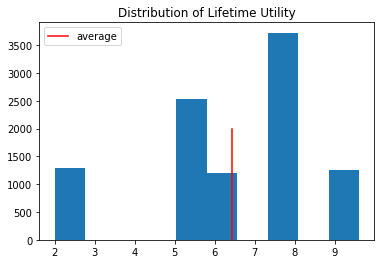

In [12]:
plt.hist(results)
plt.title('Distribution of Lifetime Utility')
plt.plot([results.mean(),results.mean()],[0,2000],'red',label='average')
plt.legend()
plt.show()

In [52]:
results.mean()

6.432807824124532

In [53]:
#Extensions:
# -- longer time horizon (increase T)
# -- continuous variables (interpolation)
# -- income as a markov process (employment-unemployment dynamics)

## Continuous Choice

When solving dynamic programming problems with continuous variables we will have to **discretize** the state space and approximate the value function. To obtain the value at other points we will use the interpolation techniques studied last week.

In [13]:
#Step 1: What should you do in period 3? -- spend everything

NPOINTS = 15

asset_grid3=np.linspace(0,W0+3*D.max(),NPOINTS) #notice that we will 1) not restrict for assets to be integers
                                                    #2) not be able to use asset grid as indexes
                                                    #3) compute exact values at 15 points and approximate everywhere else
policy3=asset_grid3.copy() #the best policy in period 20 is to spend everything
value3=util(policy3) #the value of having x units is u(x)

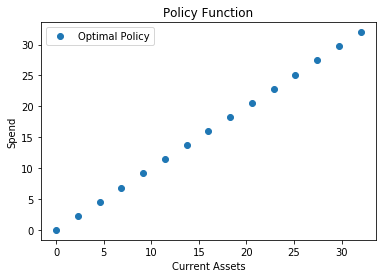

In [14]:
plt.plot(asset_grid3,policy3,'o',label='Optimal Policy')
plt.xlabel('Current Assets')
plt.title('Policy Function')
plt.ylabel('Spend')
plt.legend()
plt.show()

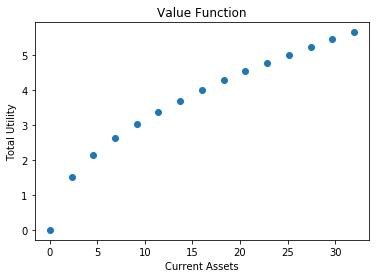

In [15]:
plt.plot(asset_grid3,value3,'o')
plt.xlabel('Current Assets')
plt.title('Value Function')
plt.ylabel('Total Utility')
plt.show()

In [16]:
from scipy.interpolate import interp1d

V3 = interp1d(asset_grid3, value3, kind='linear')

In [17]:
V3(5.5)

array(2.33330311)

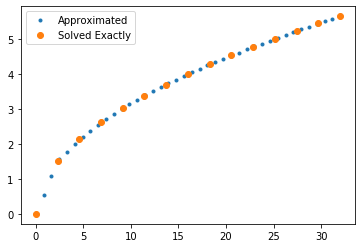

In [18]:
xnew = np.linspace(0, W0+3*D.max(), num=40)
plt.plot(xnew, V3(xnew),'.',label='Approximated')
plt.plot(asset_grid3,value3,'o',label='Solved Exactly')
plt.legend()
plt.show()

In [19]:
# Step 2: Suppose you are in period 2 and you have W=5.5 in total
# What x maximizes that u(x)+ .5(Value3(5.5-x))+.5(Value20(5.5-x+10)?

def negExpectedPayoff2(x,W):
    return -(util(x)+.5*V3(W-x)+.5*V3(W-x+10))

In [20]:
#We can pass extra parameters via args=(.)
result = so.minimize(negExpectedPayoff2,0,args=(5.5,))
print(result.x[0])

3.2142857085121754


In [21]:
result

      fun: -4.299579752848359
 hess_inv: array([[0.97819828]])
      jac: array([0.04735279])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 384
      nit: 6
     njev: 124
   status: 2
  success: False
        x: array([3.21428571])

In [23]:
# Step 3: Find the optimal policy in period 2 (i.e., for all possible a)

asset_grid2=np.linspace(0,2+2*10,num=15) #I will do this for 15 points
policy2=np.zeros_like(asset_grid2)
value2=np.zeros_like(asset_grid2)

for i,a in enumerate(asset_grid2):
    
    if i==0:
        policy2[i] = 0
        value2[i] = - negExpectedPayoff2(0,0)
    else:        
        res = so.minimize(negExpectedPayoff2,a/2,args=(a,)) #Notice we pass extra parameters to expectedPayoffs via args=(.)
        policy2[i] = res.x[0]
        value2[i] = -res.fun

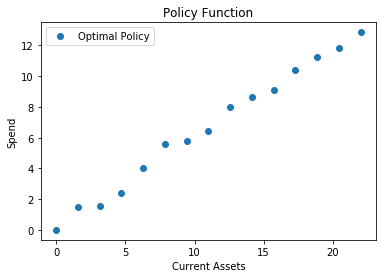

In [24]:
plt.plot(asset_grid2,policy2,'o',label='Optimal Policy')
plt.xlabel('Current Assets')
plt.title('Policy Function')
plt.ylabel('Spend')
plt.legend()
plt.show()

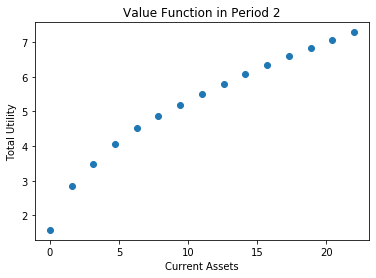

In [25]:
plt.plot(asset_grid2,value2,'o')
plt.xlabel('Current Assets')
plt.title('Value Function in Period 2')
plt.ylabel('Total Utility')
plt.show()

In [26]:
V2 = interp1d(asset_grid2, value2, kind='linear')

In [27]:
xnew

array([ 0.        ,  0.82051282,  1.64102564,  2.46153846,  3.28205128,
        4.1025641 ,  4.92307692,  5.74358974,  6.56410256,  7.38461538,
        8.20512821,  9.02564103,  9.84615385, 10.66666667, 11.48717949,
       12.30769231, 13.12820513, 13.94871795, 14.76923077, 15.58974359,
       16.41025641, 17.23076923, 18.05128205, 18.87179487, 19.69230769,
       20.51282051, 21.33333333, 22.15384615, 22.97435897, 23.79487179,
       24.61538462, 25.43589744, 26.25641026, 27.07692308, 27.8974359 ,
       28.71794872, 29.53846154, 30.35897436, 31.17948718, 32.        ])

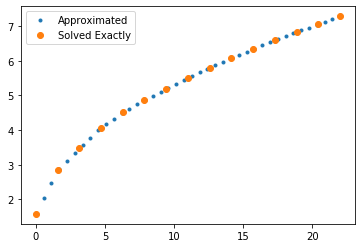

In [28]:
xnew = np.linspace(0, W0+2*D.max(), num=40)
plt.plot(xnew, V2(xnew),'.',label='Approximated')
plt.plot(asset_grid2,value2,'o',label='Solved Exactly')
plt.legend()
plt.show()

In [29]:
# Step 4: Find the optimal policy for every period t (continue working backwards)

def negExpectedPayoff(x,A,V):
    ''' V is the interpolated value function. (Interpolation done via interp1d)'''
    return -(util(x)+.5*V(A-x)+.5*V(A-x+10))


NPOINTS = 15 

assets = np.zeros(shape=(T,NPOINTS))
policies = np.zeros_like(assets)
values = np.zeros_like(assets)

for t in range(T,0,-1):
    
    max_assets = W0+t*D.max()
    assets[t-1] = np.linspace(0,max_assets,NPOINTS)
    
    if t==T:
        
        policies[t-1] = assets[t-1].copy() #the best policy in period 20 is to spend everything
        values[t-1] = util(policies[t-1]) #the value of having x units is u(x)
    
    else:
        
        Vnext = interp1d(assets[t], values[t], kind='linear',fill_value="extrapolate")

        for i,a in enumerate(assets[t-1]):
            if i==0:
                policies[t-1][i] = 0
                values[t-1][i] = - negExpectedPayoff(0,0,Vnext)
            else:
                bnds = ((0,a),) #set boundaries for the optimizer
                res = so.minimize(negExpectedPayoff,a/2,args=(a,Vnext),bounds=bnds) #Notice we pass extra parameters to expectedPayoffs via args=(.)
                policies[t-1][i] = res.x[0]
                values[t-1][i] = - res.fun        

In [30]:
policies

array([[ 0.        ,  0.85714286,  0.99934947,  1.03195171,  1.85714274,
         2.71428571,  2.83116005,  2.98008023,  3.33291509,  3.37891939,
         3.85714287,  4.71428571,  4.96768028,  5.11941723,  5.71428572],
       [ 0.        ,  1.4960186 ,  1.55238252,  2.42857143,  3.99999999,
         5.57142779,  5.80253627,  6.4285967 ,  7.99999999,  8.64772711,
         9.12418861, 10.42857143, 11.25617177, 11.83207352, 12.85714281],
       [ 0.        ,  2.28571429,  4.57142857,  6.85714286,  9.14285714,
        11.42857143, 13.71428571, 16.        , 18.28571429, 20.57142857,
        22.85714286, 25.14285714, 27.42857143, 29.71428571, 32.        ]])

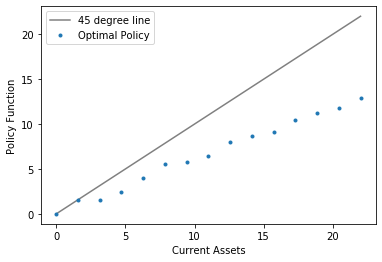

In [31]:
t=2 #
plt.plot(assets[t-1],assets[t-1],'gray',label='45 degree line')
plt.plot(assets[t-1],policies[t-1],'.',label='Optimal Policy')
plt.xlabel('Current Assets')
plt.ylabel('Policy Function')
plt.legend()
plt.show()

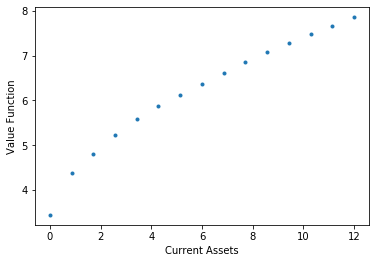

In [33]:
t=1 #
plt.plot(assets[t-1],values[t-1],'.')
plt.xlabel('Current Assets')
plt.ylabel('Value Function')
plt.show()

In [34]:
policies[t-1]

array([0.        , 0.85714286, 0.99934947, 1.03195171, 1.85714274,
       2.71428571, 2.83116005, 2.98008023, 3.33291509, 3.37891939,
       3.85714287, 4.71428571, 4.96768028, 5.11941723, 5.71428572])

Notes
- grid really broad in period 20
- relevant range 

In [35]:
lin_x = np.linspace(0,W0+t*D.max(),NPOINTS)

In [36]:
geom_x = np.geomspace(1,W0+t*D.max()+1,NPOINTS)-1

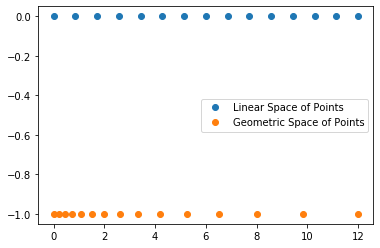

In [37]:
plt.plot(lin_x,np.zeros_like(lin_x),'o',label='Linear Space of Points')
plt.plot(geom_x,-np.ones_like(geom_x),'o',label='Geometric Space of Points')
plt.legend()
plt.show()

## Income as a Markov process

Suppose that the dividends are driven by the state of the economy and that the economic transition is modeled by the following Markov Chain process:

$S \in \{Expansion,Recession\}$

$M=\left(\begin{array}{cc} 
.8 & .2\\ 
.5 & .5
\end{array}\right)$

That is, when the economy is in the Expansion, the dividend is 10, but when the economy is in the recession, the dividend is 0.

In [38]:
def negExpectedPayoff(x,A,S,Vexp,Vrec):
    ''' V is the interpolated value function. (Interpolation done via interp1d)'''
    T = np.array([[.8,.2],[.5,.5]])
    
    return -(util(x)+T[S][0]*Vexp(A-x+10)+T[S][1]*Vrec(A-x))

In [39]:
# Step 4: Find the optimal policy for every period t (continue working backwards)

T=20 #Number of periods
W0=2 #Starting assets
I=D.max()#Income
NPOINTS = 10 

assets = np.zeros(shape=(T,NPOINTS)) 
policies = np.zeros(shape=(T,NPOINTS,2)) #The third entry corresponds to states of the economy
values = np.zeros(shape=(T,NPOINTS,2))

for t in range(T,0,-1):

    assets[t-1] = np.linspace(0,W0+t*I,NPOINTS)
    
    if t==T:
        
        #Expansion state
        policies[t-1,:,0] = assets[t-1].copy() #the best policy in period 20 is to spend everything
        values[t-1,:,0] = util(policies[t-1,:,0]) #the value of having x units is u(x)
        
        #Recession state
        policies[t-1,:,1] = assets[t-1].copy() #the best policy in period 20 is to spend everything
        values[t-1,:,1] = util(policies[t-1,:,1]) #the value of having x units is u(x)
    
    else:
        
        VnextExp = interp1d(assets[t], values[t,:,0], kind='cubic',fill_value="extrapolate")
        VnextRec = interp1d(assets[t], values[t,:,1], kind='cubic',fill_value="extrapolate")

        for s in [0,1]: #need to go through expansion (0) and recession (1) states
            
            for i,A in enumerate(assets[t-1]):

                if i==0:
                    
                    policies[t-1,i,s] = 0
                    values[t-1,i,s] = - negExpectedPayoff(0,0,s,VnextExp,VnextRec)
                    
                else:
                    
                    bnds = ((0,A),) #set boundaries for the optimizer
                    res = so.minimize(negExpectedPayoff,A/2,args=(A,s,VnextExp,VnextRec),bounds=bnds) #Notice we pass extra parameters to expectedPayoffs via args=(.)
                    policies[t-1,i,s] = res.x[0]
                    values[t-1,i,s] = - res.fun   

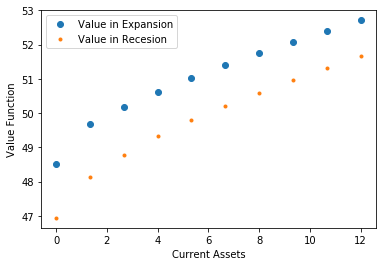

In [40]:
t=1 #
plt.plot(assets[t-1],values[t-1,:,0],'o',label='Value in Expansion')
plt.plot(assets[t-1],values[t-1,:,1],'.',label='Value in Recesion')
plt.xlabel('Current Assets')
plt.ylabel('Value Function')
plt.legend()
plt.show()

# Infinite-horizon Dynamic Programming

## Motivating Example (Job Search）

Consider an unemployed agent receives in each period a job offer at wage $w_t$.

The wage offer is a nonnegative function of some underlying state. 

$w_t = w(s_t)$,  where $s_t \in S$

Assume that in each period, $s_t$ is an independent random draw from a Beta-Binomial distribution, as shown below. Assume that we have 51 different states, the wage offer ranges from 10 to 60 with different probabilities q(s).

At the start of each period, the agent observes the value of the state $s_t$ and hence knows $w_t=w(s_t) = s_t+10$

At each period t, the agent has two choices:
- Accept the offer and work permanently at constant wage $w_t$
- Reject the offer, receive unemployment compensation c, and consider next period

The agent is infinitely lived and aims to maximize the expected discounted sum of earnings
$$ E\sum^{\infty}_{t=0} \beta^t y_t$$

##### Problem 

The agent faces a trade-off:
    - Waiting too long for a good offer is costly, since the future is discounted
    - Accepting too early is costly, since btter offers might arrive in the future 
    
##### Goal

At each period t, for a received job offer with wage $w_t$, decide whether to accept the offer or not. 


In [44]:
BetaBinomial?

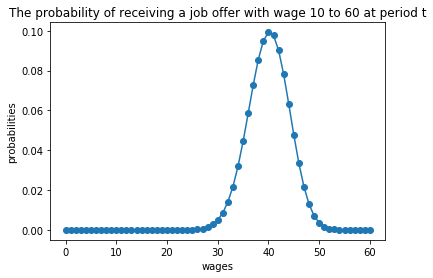

In [43]:
from scipy.stats import betabinom as BetaBinomial
# wage range from 10 to 60, discrete value, integers
wage_grid = np.linspace(0, 60, 61)
# parameter: n = 50, a = 200, b = 100
q = BetaBinomial.pmf(wage_grid,60, 200, 100)

fig, ax = plt.subplots()
plt.title("The probability of receiving a job offer with wage 10 to 60 at period t")
ax.plot(wage_grid, q, '-o' )
ax.set_xlabel('wages')
ax.set_ylabel('probabilities')

plt.show()

# Optimal Policy is Obtained through Value Function Iteration

> **value function iteration** -- an algorithm for computing value functions for infinite-horizon dynamic programming problems

    
To decide optimally in the face of this trade-off, we use dynamic programming:
    1. first assigns values to "states"
    2. deduces optimal actions given those values

Let $v_t(s)$ denote the total lifetime value accuring to an unemployed agent who enters the curret period t unemployed. The state is $s_t= s$ and wage is $w_t=w(s)$.

Moreover, let $v^*(s)$ denote the value of each possible state when the agent makes optimal decision from an arbitrary period t and all future periods $\{ t+1,t+2,t+3,...\infty \}$. Think of $v^*(s)$ as the maximal lifetime value that can be obtained with the offer at hand. 

The optimal value function $v^*$ must satisfy the recursion:
$$ v^*(s_t) = max \{ \frac{w(s_t)}{1-\beta}, c+\beta \sum_{s_{t+1} \in S} v^*(s_{t+1})q(s_{t+1}) \} $$


This is a version of the Bellman equation, which is ubiquitous in economic dynamics and other fields involving planning over time.

The intuition behind it is as follows:


- **First term** inside the max operation is the lifetime payoff from accepting current offer, since
$$ \frac{w(s)}{1-\beta} = w(s) + \beta w(s) + \beta^2 w(s) + ... $$


- **Second term** inside the max operation is the **continuation value**, which is the lifetime payoff from rejecting the current offer and then behaving optimally in all subsequent periods

If we optimize and pick the best of these two options, we obtain maximal lifetime value from today, given current state s, which is previsely $v^*(s)$.

Once we have the optimal value function $v^*$, the optimal policy is obtained by comparing the two terms in the max operation. 

Given any $s_t$, an unemployed agent should accept the job offer if $\frac{w(s_t)}{1-\beta} \geq c+\beta \sum_{s_{t+1} \in S} v^*(s_{t+1})q(s_{t+1})$; decline otherwise. 


# Value Function Iteration Algorithm

Initialize $V(s)$ arbitrary (e.g., accept each offer, $V(s)=\frac{w(s)}{1-\beta}$, $\forall s \in S$)

Repeat until the change in value function ($\Delta$) is small:
- For each $s\in S$
    - $v \leftarrow V(s)$ // save current value
    - $V(s) \leftarrow max\{ \frac{w(s)}{1-\beta}, c+\beta \sum_{s \in S} v^*(s)q(s)   \}$, where $q(s)$ is the probability of state s.
    - $\Delta \leftarrow max(\Delta,|v-V(s)|)$
    
The optimal policy is
- $\pi(s)= \boldsymbol{1} \{ \frac{w(s)}{1-\beta} \geq c+\beta \sum_{s \in S} v^*(s)q(s) \}$

##### Practice Problem

Assume that there are 51 states, the probability of each state follows a Beta-Binomial distribution (a = 200, b = 100) and the corresponding wage ranges from 10 to 60 ($w_t = s_t+10$). The discount rate is $\beta=.9$. The unemployment compensation c = 25. An infinitely lived unemployed agent tries to maximize his total earning and wants to know at each state (each wage level), whether he should accept or reject the offer. 

Write a program to implement the value function iteration and find the optimal policy for the motivating problem above

In [110]:
# Step 1. Initialize value function, since we have 50 states, 
beta = 0.9
c = 25
states = np.arange(51)

# Set up the initial value function, either one works
# values = np.zeros(51)
values = wage_grid / (1-beta)

#Step 2. For a given value function, define a new function that inputs a value of state, and returns the two terms in the max operation
# Recall from above, the probability of each state is q
def accept_reject(state, value, beta, c):
    '''state: the value of realized state
        value: a given value function
        beta: discount value
        c: unemployment compensation'''
    wage = state + 10
    accept = wage / (1-beta)
    reject = c + beta * np.sum(value * q)
    
    return np.array([accept, reject])

#Step 3. Define the stopping rule, when the difference between the new and the old value function is smaller than 0.01
# loop over all states, obtain the new value for each state, then calculate the difference


DELTA = 1
count = 1

v_next = np.empty_like(values)

while DELTA > .01 :
    print()
    print("Interation: " + str(count))
    for s in states:        
        v_next[s] = np.max(accept_reject(s, values, beta, c ))
    

    DELTA=np.max(np.abs(values-v_next))
    
    values[:] = v_next
    print(DELTA)
    count+=1


Interation: 1
315.0000000000871

Interation: 2
6.469819317943518

Interation: 3
1.8816233119268304

Interation: 4
0.6792137603258652

Interation: 5
0.2451773047728807

Interation: 6
0.0885021981104046

Interation: 7
0.031946835689495856

Interation: 8
0.01153192047615903

Interation: 9
0.004162703034523929


In [111]:
# Look at the value function, anything interesting?
values

array([424.41197735, 424.41197735, 424.41197735, 424.41197735,
       424.41197735, 424.41197735, 424.41197735, 424.41197735,
       424.41197735, 424.41197735, 424.41197735, 424.41197735,
       424.41197735, 424.41197735, 424.41197735, 424.41197735,
       424.41197735, 424.41197735, 424.41197735, 424.41197735,
       424.41197735, 424.41197735, 424.41197735, 424.41197735,
       424.41197735, 424.41197735, 424.41197735, 424.41197735,
       424.41197735, 424.41197735, 424.41197735, 424.41197735,
       424.41197735, 430.        , 440.        , 450.        ,
       460.        , 470.        , 480.        , 490.        ,
       500.        , 510.        , 520.        , 530.        ,
       540.        , 550.        , 560.        , 570.        ,
       580.        , 590.        , 600.        ])

In [112]:
#Step 4: Once we obtain the value function, use the value function to back out the policy function
# The value function shows the maximal lifetime earnings for each state. 
# Notice, it stays the same for many states (in our case, until when state=33)
# It suggests that when the state is bad/wage is low, the optimal decision is to reject the offer and wait for later

# By comparing the optimal value function with the expected value of accepting each offer at each state, we know when the agent will accept the offer
Accept = values == wage_grid / (1-beta)
Accept



array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

Moreover, with the optimal value, we can calculate the reservation wage.

Reservation wage is the wage where an agent is indifferent between accepting the offer and rejecting, where $\frac{w(s)}{1-\beta} =  c+\beta \sum_{s \in S} v^*(s)q(s) $

$ w_r = (1-\beta)* ( c+\beta \sum_{s \in S} v^*(s)q(s)) $

Extra: change the parameters, discount value / compensation, and see how the reservation wage changes! 

In [113]:
wage_r = (1-beta)*(c+beta*np.sum(values*q))
wage_r

42.441347997255825